# Exploratory Data Analysis on Super Market Data on Deepavali Festival

#### Objective : To clean and analyse the sales data inorder to visualize the impact of Deepvali festival on Super Market Sales across various category and customer segment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"D:\PYTHON\Deepavali Sales\Deepavali Sales Data.csv")

In [3]:
# getting the structure of a dataframe (rows ,columns)
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


#### This dataset contains line-level transaction details from a store that sells products across various categories. Assigning a primary key based on any single column is not feasible, as customers may make multiple purchases over time and each time they are  identified by the same User_ID due to their registered details in the system.

In [6]:
df.info() # Getting the description of each field of a dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Data Cleaning

#### Treating the duplicates

In [7]:
df[df.duplicated()] # Checking for Duplicate Entries overall

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0,NaN,NaN
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0,NaN,NaN
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0,NaN,NaN
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0,NaN,NaN
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0,NaN,NaN
8651,1000083,Gute,P00242842,M,26-35,35,0,Uttar Pradesh,Central,Hospitality,Clothing & Apparel,3,5345.0,NaN,NaN
8941,1001476,Anudeep,P00036842,M,18-25,25,0,Maharashtra,Western,IT Sector,Clothing & Apparel,4,5202.0,NaN,NaN
10571,1004404,Rittenbach,P00150142,F,26-35,28,1,Haryana,Northern,Aviation,Electronics & Gadgets,3,2304.0,NaN,NaN


##### There are 7 rows which are duplicated when considered all the columns to identify the duplicates, So dropping them.

In [8]:
df.drop_duplicates(inplace =True) # Dropping the duplicate entries from the dataframe on overall attribute basis
df[df.duplicated()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1


#### Treating the columns with null values

In [9]:
((df.isna().sum()/len(df))*100).round(2).astype(str)+'%' # Checking for Percentage of null value in a field

User_ID               0.0%
Cust_name             0.0%
Product_ID            0.0%
Gender                0.0%
Age Group             0.0%
Age                   0.0%
Marital_Status        0.0%
State                 0.0%
Zone                  0.0%
Occupation            0.0%
Product_Category      0.0%
Orders                0.0%
Amount               0.11%
Status              100.0%
unnamed1            100.0%
dtype: object

##### Dropping Columns Status and unnamed1 as 100% of the data is null

In [10]:
df.drop(['Status','unnamed1'],axis=1,inplace= True)

In [11]:
df.shape

(11243, 13)

##### Imputing the Amount column since it hase 0.1 % Null values

In [12]:
df[df.Amount.isnull()]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


##### Creating a dataframe with avearge for each Pruduct category and order value for imputing amount column

In [13]:
a=pd.pivot_table(data =df, index=['Product_Category','Orders'],aggfunc={"Amount":"mean"}).round(2).reset_index()

In [14]:
a

,Product_Category,Orders,Amount
0,Auto,1,19993.84
1,Auto,2,20397.32
2,Auto,3,20531.05
3,Auto,4,19764.44
4,Beauty,1,4596.55
...,...,...,...
67,Tupperware,4,16046.38
68,Veterinary,1,1428.59
69,Veterinary,2,1391.35
70,Veterinary,3,1325.59


In [15]:
df =pd.merge(df,a,on =['Product_Category','Orders'],how='left') # merging the Main dataframe with Average values 

In [16]:
def amount(a):
    if pd.isna(a['Amount_x']):
        return a['Amount_y']
    return a['Amount_x']

df['Amount']=df.apply(amount,axis=1)

In [17]:
df[df.Amount_x.isna()] # Checking if the Values have updated

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount_x,Amount_y,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,19993.84,19993.84
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN,20531.05,20531.05
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN,20531.05,20531.05
108,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN,15061.71,15061.71
110,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN,14863.73,14863.73
183,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN,15061.71,15061.71
292,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN,14132.15,14132.15
343,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN,15588.24,15588.24
344,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN,15061.71,15061.71
451,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN,13874.13,13874.13


In [18]:
df.drop(['Amount_x','Amount_y'],axis=1,inplace =True) # Dropping the other Amount column to have only one imputed Amount column

In [19]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


#### Changing the Datatype of columns as per requirement

In [20]:
df.User_ID.dtypes

dtype('int64')

##### Changing datatype to string  as it will be considered as int while doing the descriptive statistics which leads to wrong explanation of data.

In [21]:
df['User_ID'] =df.User_ID.astype(str) 

In [22]:
df.User_ID.dtypes

dtype('O')

In [23]:
df.dtypes

User_ID              object
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

##### Chaning the Marital Status column from integer to object by creating a category as married and unmarried.

In [24]:
df['Marital_Status']= df.Marital_Status.apply(lambda x : "Married" if x==1 else "Unmarried")

In [25]:
df.Marital_Status.unique()

array(['Unmarried', 'Married'], dtype=object)

### Exploratory Data Analysis

##### Checking the Central Tendency, distribution and dispersion of data.

In [26]:
df.describe()[['Age','Orders','Amount']]

,Age,Orders,Amount
count,11243.000000,11243.000000,11243.000000
mean,35.422841,2.488749,9461.098521
std,12.756369,1.114960,5224.021131
min,12.000000,1.000000,188.000000
25%,27.000000,1.000000,5444.000000
50%,33.000000,2.000000,8111.000000
75%,43.000000,3.000000,12693.500000
max,92.000000,4.000000,23952.000000


In [27]:
df.describe(include=['object'])

,User_ID,Cust_name,Product_ID,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category
count,11243,11243,11243,11243,11243,11243,11243,11243,11243,11243
unique,3755,1250,2351,2,7,2,16,5,15,18
top,1001680,Vishakha,P00265242,F,26-35,Unmarried,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,24,42,53,7838,4538,6518,1944,4294,1586,2653


##### Above Statistical analysis give idea about Average age group of people who are active, distribution of amount, and Leading Categories (Frequency of occurance)  in the dataset interms of age group, gender, marital status, region, Occupation, Product category

#### Visual Representation of Data

Text(0.5, 0, 'Age Group')

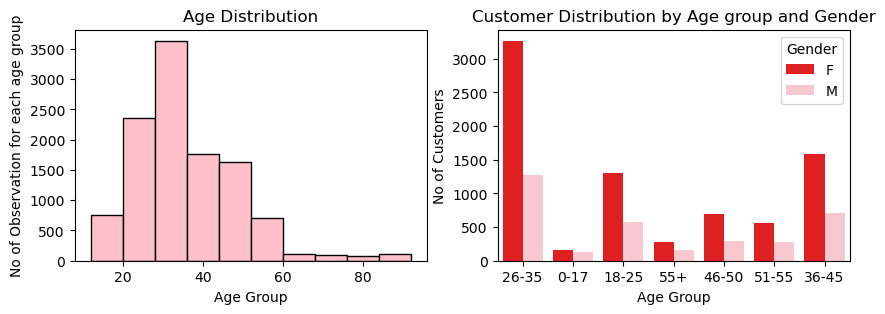

In [31]:
fig,axes=plt.subplots(1,2,figsize=(10,3))

#plt.figure(figsize=(10,10))

# Plotting histogram to see the distribution of Age 
axes[0].hist(df.Age,color='pink',edgecolor ='black',bins=10)
axes[0].set_title('Age Distribution')
#plt.title("Age Distribution")
axes[0].set_ylabel('No of Observation for each age group')
axes[0].set_xlabel('Age Group')

# Plotting Clustered bar chart to show the Customer Distribution by Age and Gender
sns.countplot(data=df,x='Age Group',hue='Gender',palette={'F':'red','M':'pink'},ax=axes[1])
axes[1].set_title('Customer Distribution by Age Group and Gender')
axes[1].set_ylabel('No of Customers')
axes[1].set_xlabel('Age Group')
#axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation =90)


##### Majority of the customer's are of age between 25 to 45 and Most of them are being Female.

Text(0.5, 1.0, 'Distribution of Gender across Marital Status interms of Sales Amount ')

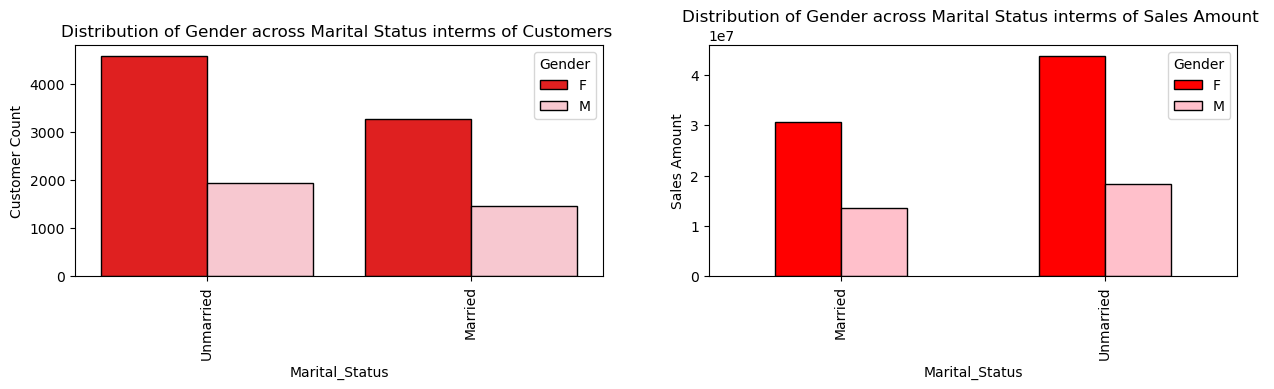

In [30]:
fig,axes =plt.subplots(1,2,figsize=(15,3))
#plt.figure(figsize=(3,3))
sns.countplot(data=df,x='Marital_Status',hue='Gender',edgecolor='black',palette={'F':'red','M':'pink'},ax=axes[0])
axes[0].set_ylabel("Customer Count")
axes[0].set_title("Distribution of Gender across Marital Status interms of Customers ")
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation =90)


pd.pivot_table(data=df,index='Marital_Status',columns='Gender',
values='Amount',aggfunc='sum').plot(kind='bar',edgecolor='black',color=['red','pink'],ax=axes[1])
axes[1].set_ylabel("Sales Amount")
axes[1].set_title("Distribution of Gender across Marital Status interms of Sales Amount ")

##### Clearly Female's Shop's more compared to male from both Married and Unmarried population of Customer.

##### Region wise Sales 

(-1.0999998053163802, 1.0999999907293514, -1.099999504084992, 1.09999317216351)

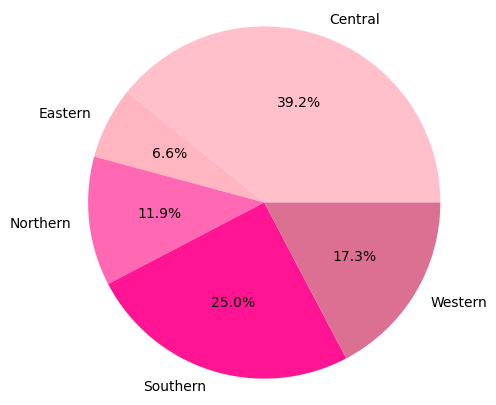

In [31]:
plt.figure(figsize=(5,5))
a=df.groupby('Zone')['Amount'].sum()
pink_shades = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585']
colors = pink_shades[:len(a)]
plt.pie(a,autopct='%.1f%%',labels=a.index,colors=colors)
plt.axis('equal')

##### Deepavali has greater impact on the Central, Southern and Western part of India, Below graph presents the state wise sales for each Zone

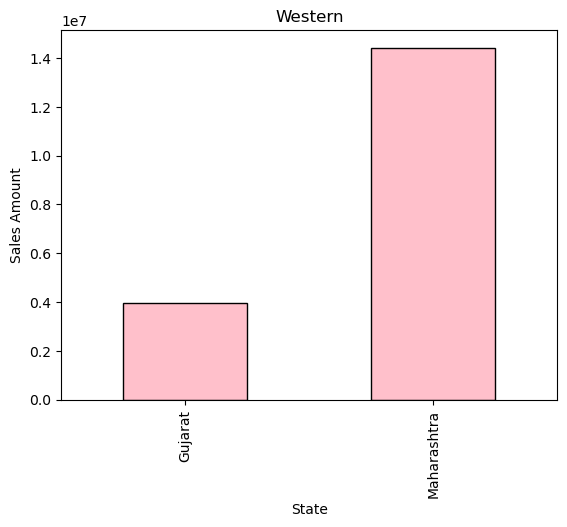

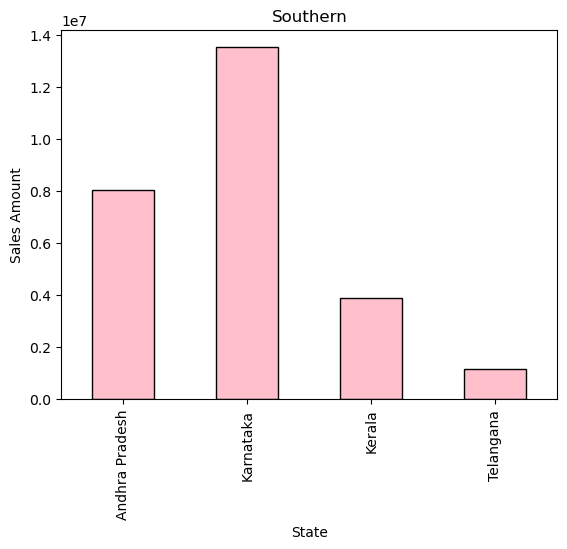

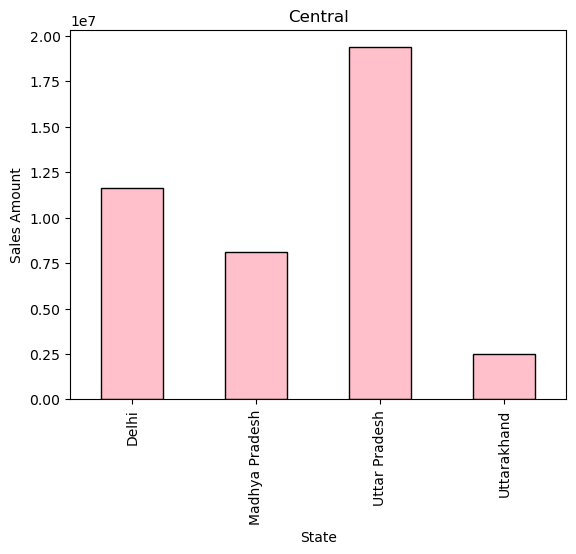

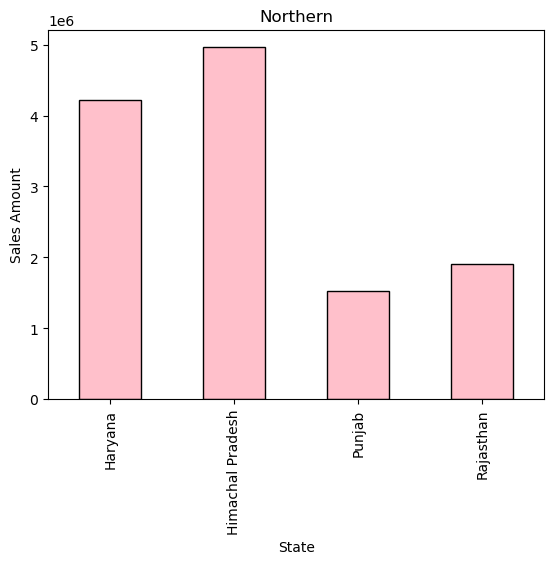

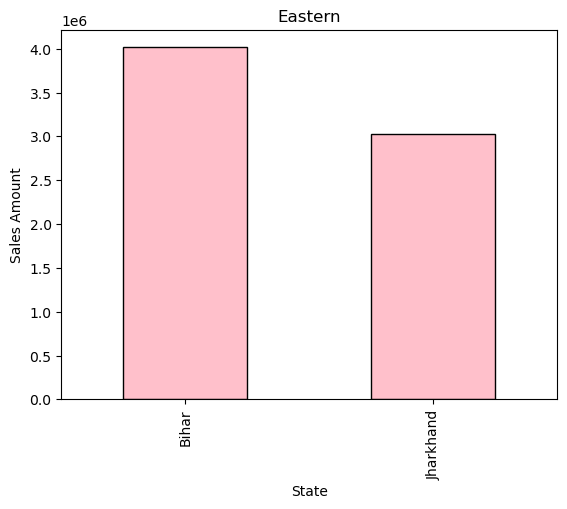

In [32]:
# Zone and State wise Sales
region =df.Zone.unique()
state =df.State.unique()

for x in region:
    d=df[df.Zone==x]
    d.groupby(['State'])['Amount'].sum().plot(kind='bar',color='pink',edgecolor='black')
    plt.title(x)
    plt.xlabel('State')
    plt.ylabel('Sales Amount')
    plt.show()
    

##### Uttar Pradesh and Maharastra of Central and Western Regions respectively are leading in sales followed by Karnataka of Southern Zone

#### Impact of Occupation and Product Category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Office'),
  Text(1, 0, 'Veterinary'),
  Text(2, 0, 'Hand & Power Tools'),
  Text(3, 0, 'Pet Care'),
  Text(4, 0, 'Decor'),
  Text(5, 0, 'Books'),
  Text(6, 0, 'Tupperware'),
  Text(7, 0, 'Household items'),
  Text(8, 0, 'Stationery'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Auto'),
  Text(11, 0, 'Sports Products'),
  Text(12, 0, 'Games & Toys'),
  Text(13, 0, 'Furniture'),
  Text(14, 0, 'Electronics & Gadgets'),
  Text(15, 0, 'Footwear & Shoes'),
  Text(16, 0, 'Clothing & Apparel'),
  Text(17, 0, 'Food')])

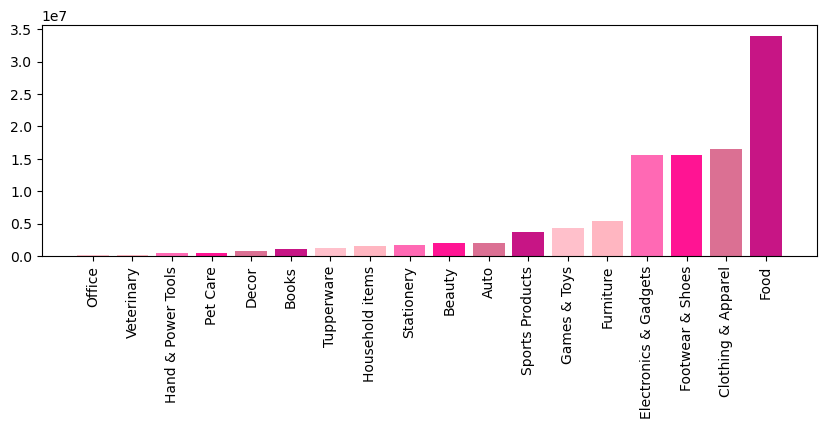

In [47]:
plt.figure(figsize=(10,3))
a=df.groupby('Product_Category')['Amount'].sum().sort_values()
pink_shades = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585']
colors = pink_shades[:len(a)]
plt.bar(a.index,a,color=colors)
plt.xticks(rotation=90)

##### During Festival Season  Food, Clothing & Apparel, Electronics & Gadgets, and Footwear & Shoes are the categories which generate  greater revenue and are of great demand.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Agriculture'),
  Text(1, 0, 'Textile'),
  Text(2, 0, 'Construction'),
  Text(3, 0, 'Food Processing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Chemical'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Media'),
  Text(9, 0, 'Hospitality'),
  Text(10, 0, 'Govt'),
  Text(11, 0, 'Banking'),
  Text(12, 0, 'Aviation'),
  Text(13, 0, 'Healthcare'),
  Text(14, 0, 'IT Sector')])

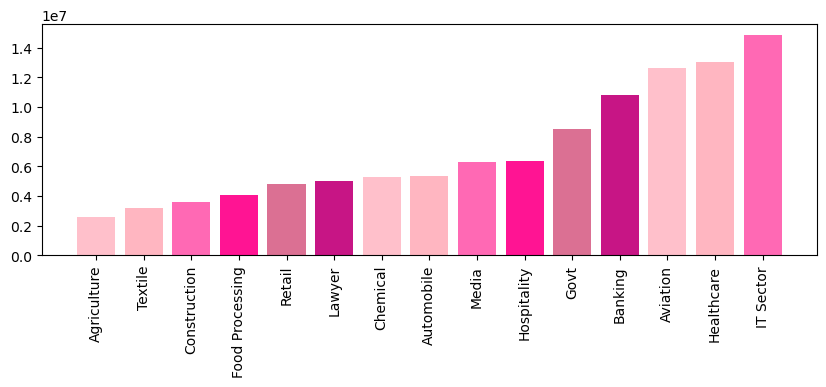

In [33]:
plt.figure(figsize=(10,3))
a=df.groupby('Occupation')['Amount'].sum().sort_values()
pink_shades = ['#FFC0CB', '#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585']
colors = pink_shades[:len(a)]
plt.bar(a.index,a,color=colors)
plt.xticks(rotation=90)


##### Customer from IT, Healthcare, Aviation, Banking Occupation are bringing more revenue to the Shop and more dependend on the shop for various products.

##### Below is the Breakdown of Sales of different Product Category for each Occupation

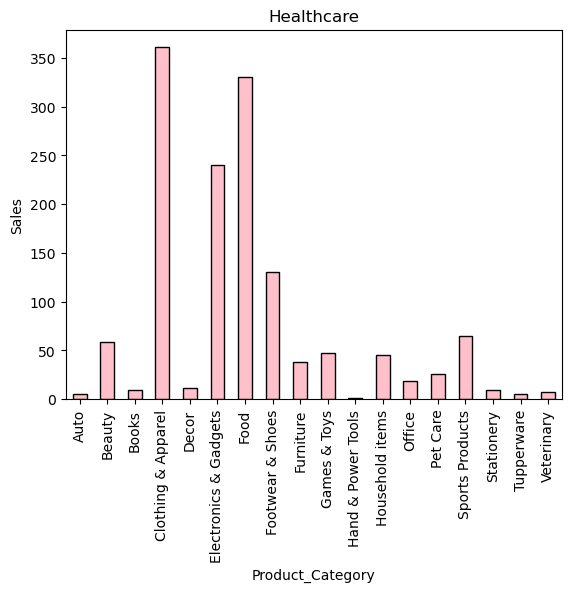

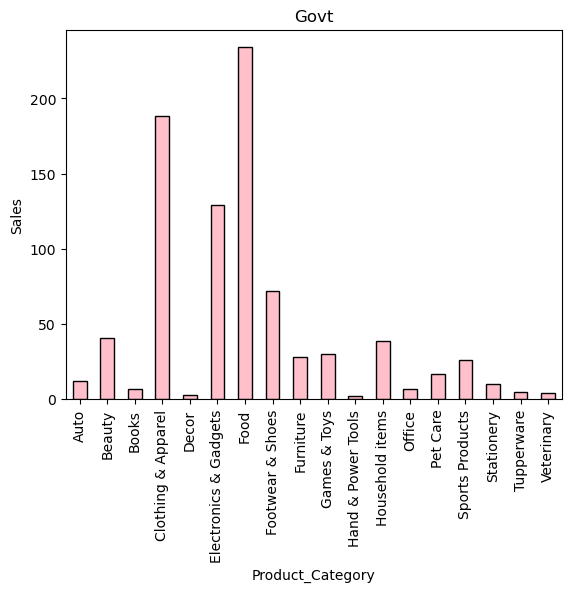

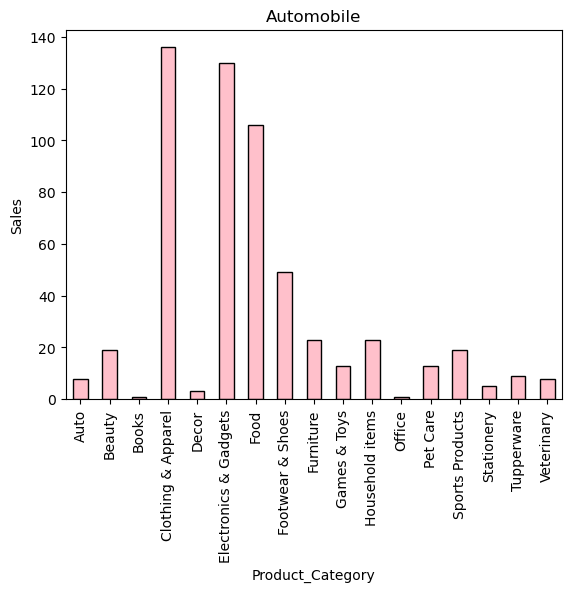

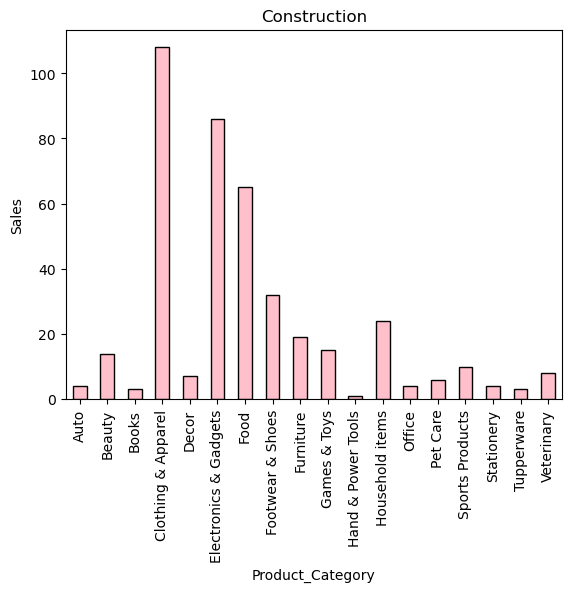

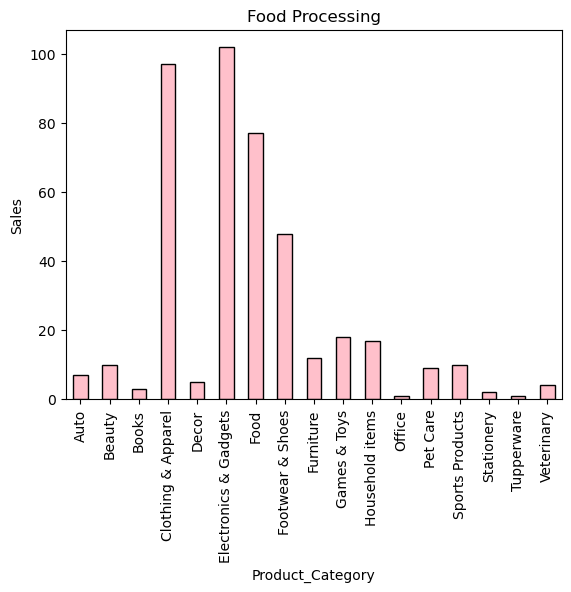

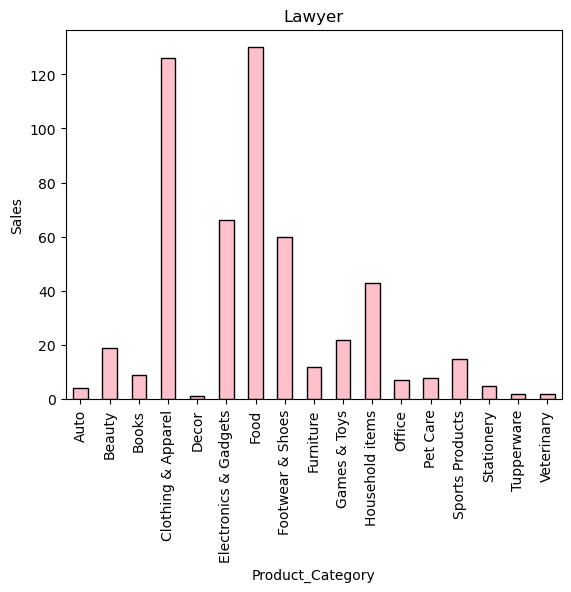

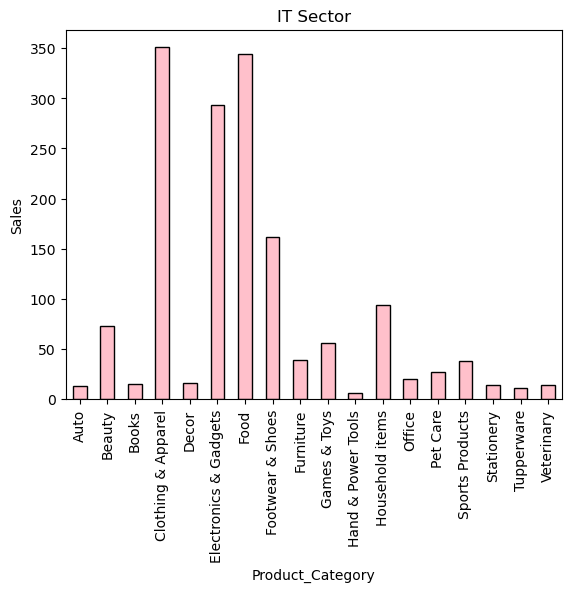

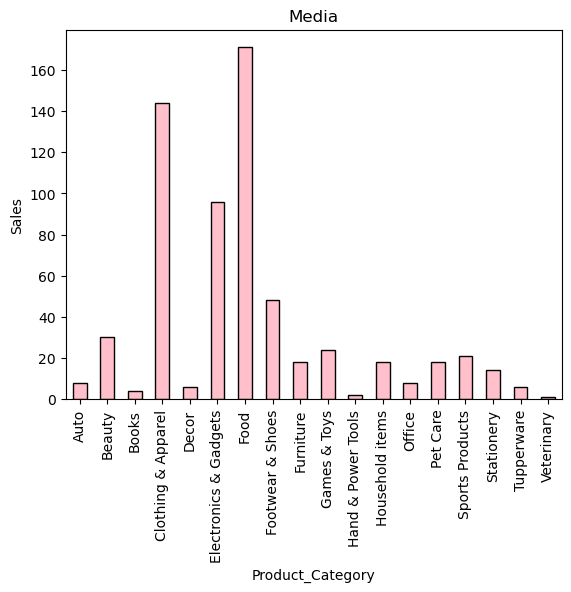

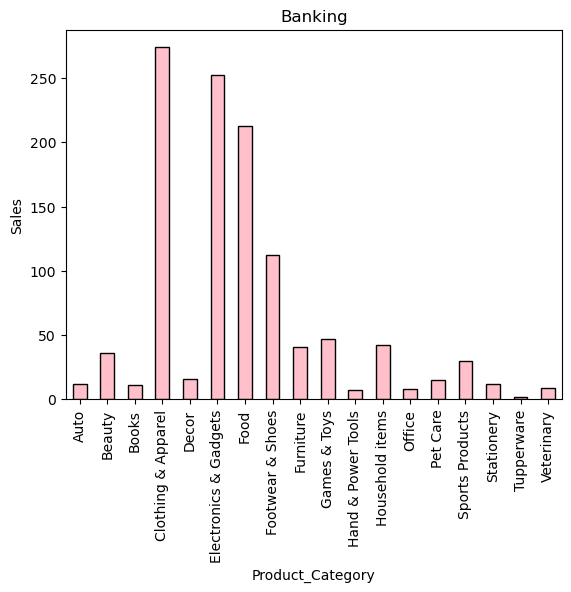

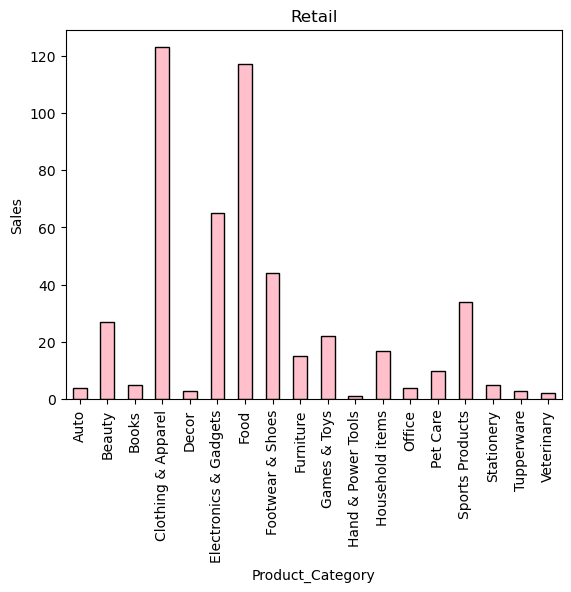

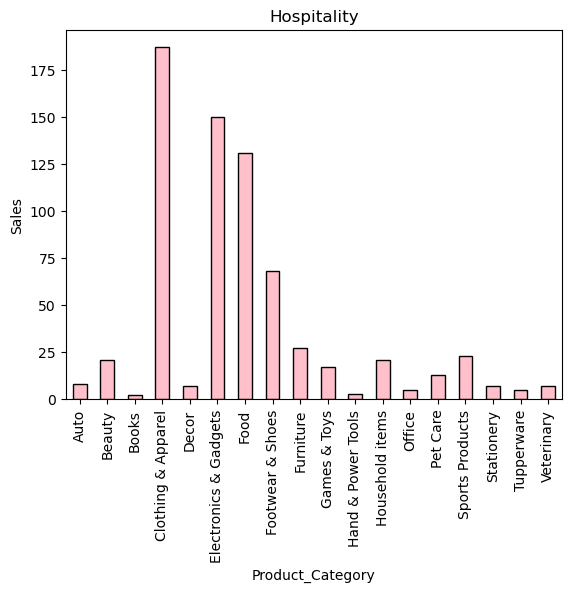

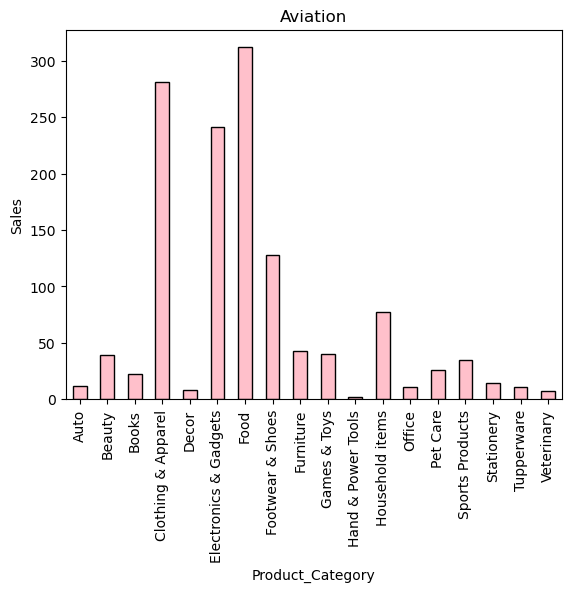

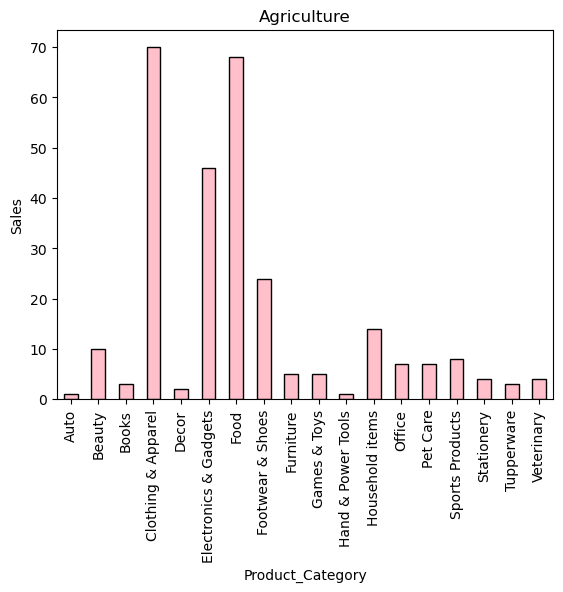

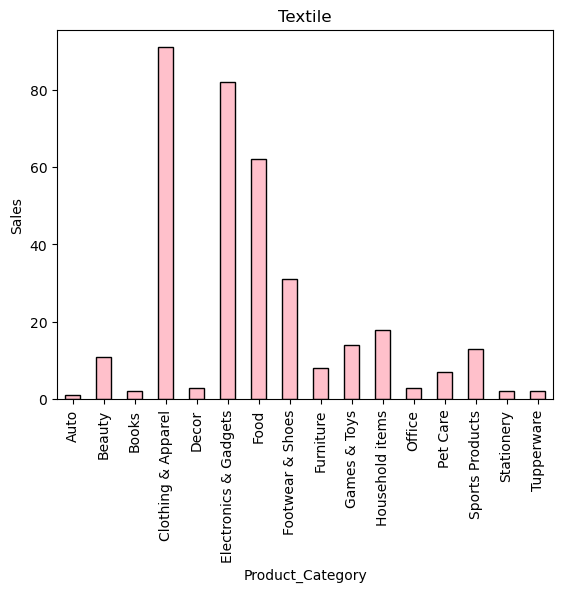

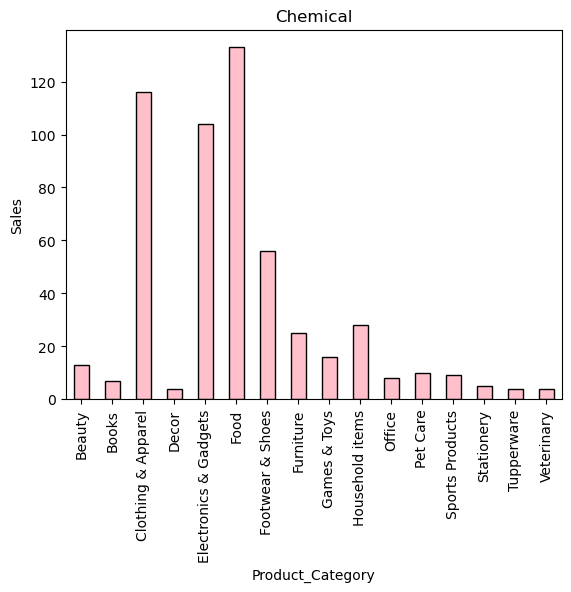

In [34]:
o= df.Occupation.unique()
pc = df.Product_Category.unique()

for x in o:
    d=df[df.Occupation == x]
    d.groupby('Product_Category')['Amount'].count().plot(kind='bar',color='pink',edgecolor='black')
    plt.title(x)
    plt.ylabel('Sales')
    plt.show()
    

##### The above visuals clearly highlight the product categories that are most popular across different occupations. This insight is valuable for inventory planning, as it helps identify which categories drive the highest demand during the Festival. Key categories to prioritize include Food, Clothing & Apparel, Electronics & Gadgets, and Footwear & Shoes. These should be given precedence when planning stock levels to ensure optimal inventory management and meet customer expectations.

### Thank you